
# Project: Investigate Appointment Show up dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100K medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. This dataset contains information such as patient ID, appointment ID, Scheduled date, Appointment date, some personal information about the patient like age, neigbourhood, schoolarship, hypertension, diabetes, alcoholism, whether SMS notification is received and etc. 

The questions I have after looked into the data are:
1. what is the overrall ratio of no show vs show
2. if the patient's personal information such as age, whether the patient receives scholarship, has hypertension, diabetes, or handicapped will be factors to impact the appointment.
3. There is time gap between scheduled and appointment dates, and whether the time gap will affect the appearance of appointment


In [2]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  


<a id='wrangling'></a>
## Data Wrangling


### General Properties: this is just to load data first and get a general idea of the columns and rows

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016 (2).csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning
after looked at the information, there is no missing field since all the columns have 110527 values, but datatype for ScheduledDay and AppointmentDay shouldn't be integer, but Datetime. also the column name can be updated as well

In [6]:
# This is to take off the specific time from the dates
df['AppointmentDay'] = df['AppointmentDay'].str[:10]
df['ScheduledDay'] = df['ScheduledDay'].str[:10]

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# This is to change the column names to lowercase, correct some misspelling, and add some underscore in between words, to make it easier to understand.
df.columns = df.columns.str.lower()
df.rename(columns = {'hipertension': 'hypertension','handcap': 'handicap','patientid':'patient_id','appointmentid':'appointment_id', 'scheduledday':'scheduled_date','appointmentday':'appointment_date','no-show':'no_show'},inplace = True)
df.head(0)

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [9]:
# This is to change the data type for Scheduled and Appointment Dates columns:
df["scheduled_date"] = pd.to_datetime(df["scheduled_date"])
df["appointment_date"] = pd.to_datetime(df["appointment_date"])
df.dtypes # This is to make sure the type changes.

patient_id                 float64
appointment_id               int64
gender                      object
scheduled_date      datetime64[ns]
appointment_date    datetime64[ns]
age                          int64
neighbourhood               object
scholarship                  int64
hypertension                 int64
diabetes                     int64
alcoholism                   int64
handicap                     int64
sms_received                 int64
no_show                     object
dtype: object

In [10]:
# when looked at the minimum value for age, it looks like the min is -1, which should be a wrong value. 
# so we need to pull the data to see if this data needs to dropped off or corrected
df[df['age']== -1]

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


since there is only 1 row, i will just drop it by index

In [11]:
df.drop([99832],inplace = True)

In [12]:
# I am adding one more column to show the time difference between Appointment Date and Scheduled Date, in order to do the analysis
# and this column needs to be integer, which will be easier to do plot analysis. 
df["appointment_schedule_timegap"] = df['appointment_date'] - df['scheduled_date']
# below is to convert this new column to string, and extract integer from the string, and the type is integer.
df["appointment_schedule_timegap"] = df["appointment_schedule_timegap"].astype(str).str.extract('(\d+)').astype(int)
df["appointment_schedule_timegap"]

0          0
1          0
2          0
3          0
4          0
5          2
6          2
7          2
8          0
9          2
10         2
11         3
12         1
13         1
14         1
15         3
16         1
17         1
18         3
19         0
20         2
21         2
22         4
23         1
24         0
25         3
26         0
27         2
28         0
29         0
          ..
110497     0
110498     0
110499     0
110500     0
110501     0
110502     0
110503     0
110504     0
110505     0
110506     0
110507     0
110508     0
110509     0
110510     0
110511     0
110512     0
110513     0
110514     0
110515     2
110516     1
110517     0
110518    41
110519    41
110520    35
110521    35
110522    35
110523    35
110524    41
110525    41
110526    41
Name: appointment_schedule_timegap, Length: 110526, dtype: int64

In [13]:
df.shape # This is to check the number of rows to make sure dropping the row and add one more column worked.

(110526, 15)

In [14]:
# this is to do a final check of the data before doing any analysis. 
df.head()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_schedule_timegap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what is the ratio of no show vs show in this dataset) 

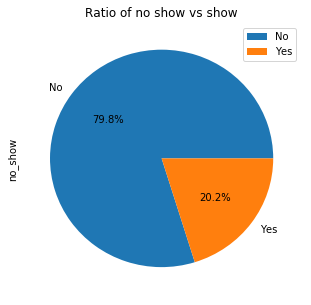

In [16]:
# Plot the proportion of Show vs NoShows as a piechart after cleaning up the data
piechart = df['no_show'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (5,5));
piechart.set_title('Ratio of no show vs show');
piechart.legend();

based on below pie chart, out of the total population, there is 79.8% patients showed up for appointment and the rest 20.2% didnt.

### Research Question 2  (Whether age is a factor to affect whether a patient will show up or not)

In [18]:
# need to check how many unique value of age in this dataset, if the number of unique value is too many, the chart won't be 
# presentable. 
df['age'].nunique()


103

since there are 103 unique values for age, I will create bins for different age group

In [19]:
# this is to create different age bins and add an age_group to the table:

# this is to create bin for every 10 years
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119]

# labels will be used to create the age_group column 
labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=labels, right=False)
df.head()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_schedule_timegap,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,60
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,50
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,60
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,50


In [20]:
# this is to group by age_group, show no show details and by appointment id since number of appointment id represent number of visit
df_by_age_group = df.groupby(['age_group','no_show'])['appointment_id'].count()
df_by_age_group

age_group  no_show
0          No         12983
           Yes         3120
10         No          9536
           Yes         3227
20         No         10397
           Yes         3444
30         No         11748
           Yes         3290
40         No         11171
           Yes         2922
50         No         13084
           Yes         2807
60         No         10729
           Yes         1939
70         No          5417
           Yes          959
80         No          2666
           Yes          497
90         No           467
           Yes          111
100        No             7
110        No             2
           Yes            3
Name: appointment_id, dtype: int64

In [21]:
# the number of visits in each age group is not really comparable so I am going to convert the number of visit into percentage
# since percentage of show or no show is more objective than the numbers. 
# so for example for age group of 0, 80.6% in this age group showed up  and 19.37% didn't
age_percent = df_by_age_group.groupby(level = 0).apply(lambda x: 100*x / float (x.sum()))
ageper = pd.DataFrame(data = age_percent)
ageper

appointment_id
age_group no_show                
0         No            80.624728
          Yes           19.375272
10        No            74.715976
          Yes           25.284024
20        No            75.117405
          Yes           24.882595
30        No            78.122091
          Yes           21.877909
40        No            79.266302
          Yes           20.733698
50        No            82.335913
          Yes           17.664087
60        No            84.693716
          Yes           15.306284
70        No            84.959222
          Yes           15.040778
80        No            84.287069
          Yes           15.712931
90        No            80.795848
          Yes           19.204152
100       No           100.000000
110       No            40.000000
          Yes           60.000000

In [22]:
# then I will only filter by Yes in no_show column, to look at the percentage of no show in each of the age group. 
no_show_table = ageper.query('no_show =="Yes"')
no_show_table

,,appointment_id
age_group,no_show,
0,Yes,19.375272
10,Yes,25.284024
20,Yes,24.882595
30,Yes,21.877909
40,Yes,20.733698
50,Yes,17.664087
60,Yes,15.306284
70,Yes,15.040778
80,Yes,15.712931


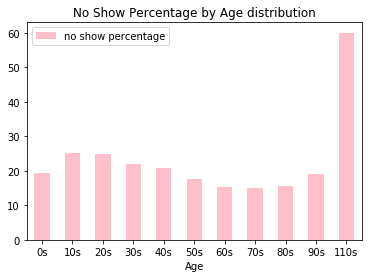

In [50]:
# this is to make a bar chart by each age group, to show the no show percentage:
agenoshow = pd.DataFrame({'Age':["0s","10s","20s","30s","40s","50s","60s","70s","80s","90s","110s"],'no show percentage':[19.375272,25.284024,24.882595,21.877909,20.733698,17.664087,15.306284,15.040778,15.712931,19.204152,60
]})
agenoshow.plot.bar(x = 'Age',y= 'no show percentage',rot=0,title = 'No Show Percentage by Age distribution',color = 'pink');


by looking at the below chart. Age group of 10 and 20 are the groups with higher no show percentage, and the no show percentage decreases as the ages go up. and it goes up again from age group of 90. 

### Research Question 3  (Whether receiving SMS Notification is a factor to affect whether a patient will show up or not)

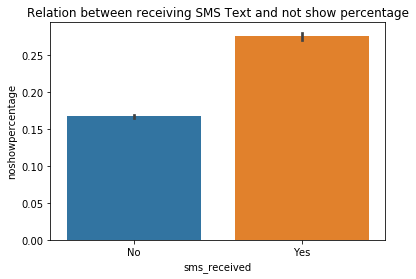

In [47]:
# this is to create a barplot chart using seaborn to see the show vs no show of appointment # has any relationship with receiving text notification
# create a sub group of the data by grouping no shows together. 
df['noshowpercentage'] = (df.no_show == "Yes").astype(int)
# below will be used to map 1 and 0 to Yes and No respectively
result = {1:'Yes', 0: 'No'}
simtext = sns.barplot(x=df.sms_received.map(result), y = df.noshowpercentage).set_title ('Relation between receiving SMS Text and not show percentage')


suprisingly, for the patients who received sms notification, they tend to not show up at the appointment, which is very interesting, it might mean that the sms notification method didn't really help with the appointment management. 

### Research Question 4  (Whether alcoholism affects whether a patient will show up or not)

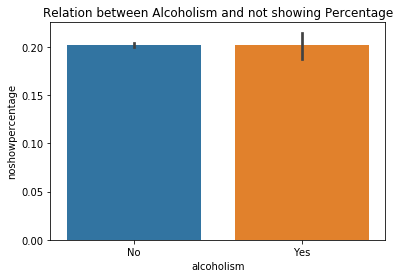

In [44]:
# Below is to check if alcoholism has any relationship with showing up for appointment by using bar. 
# it will also use the noshowpercentage created for doing the sms notification 
result = {1:'Yes', 0: 'No'}
alcoholism = sns.barplot(x=df.alcoholism.map(result), y = df.noshowpercentage).set_title("Relation between Alcoholism and not showing Percentage")

but it doesn't look like alcoholism can impact the no show percentage since the percentage of these 2 bars have the same percentage

### Research Question 5  (Whether time gap between schedule and appointment date affects whether a patient will show up or not)

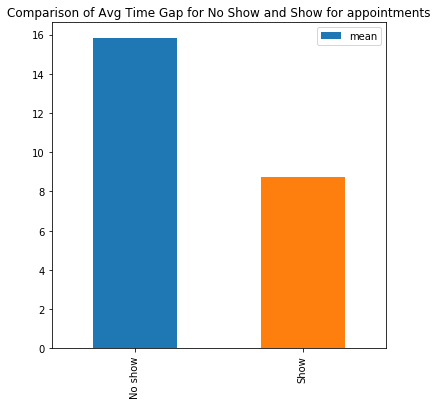

In [42]:
# create mean of time gap for both show and no show: 
no_show_timegap = df.query('no_show == "Yes"')['appointment_schedule_timegap'].mean()
show_timegap = df.query('no_show == "No"')['appointment_schedule_timegap'].mean()
timegap = pd.DataFrame({'mean': [no_show_timegap,show_timegap]},index = ['No show','Show'])
plot = timegap.plot.bar(y = 'mean',figsize = (6,6),title = 'Comparison of Avg Time Gap for No Show and Show for appointments')

In [39]:
no_show_timegap - show_timegap 

7.0776262708632611

on average, the gap time between scheduled date and appointment date is longer for the patients who didn't show up for appointments by 7 days than the patients who showed up for appointments.

<a id='conclusions'></a>
## Conclusions

This data set provided information for in total of 110,526 records, out of which 79.8% visits end up with coming in for appointment and the rest 20.2% didn't show up. Age group of 10 and 20 are the groups with higher no show percentage, and the no show percentage decreases as the ages go up. and it goes up again from age group of 90.suprisingly, for the patients who received sms notification, they tend to not show up at the appointment, which is very interesting, it might mean that the sms notification method didn't really help with the appointment management. it doesn't look like alcoholism can impact the no show percentage since the percentage of these 2 bars have the same percentage. on average, the gap time between scheduled date and appointment date is longer for the patients who didn't show up for appointments by 7 days than the patients who showed up for appointments.

The limitation of this analysis would be sample size and also the location. therefore, the same conclusion can't be drawn to a different data population. also the patients are from Brazil, we don't have much background on the neighbourhood that the data was collected, the same conclusion might not be applied to other locations even in Brazil.  

for further research, more statistics might be needed, such as the details for appointment: hospital department or center of excellence that the patient is scheduled for, physian that provided the service, and other in depth information.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0